**Оглавление:**
1. [Изучение данных](#step1)  
2. [Предобработка данных](#step2) 
3. [Приоритизация гипотез](#step3)
4. [Анализ A/B-теста](#step4)
5. [Общий вывод](#step5) 

<a id="step1"></a>
## Изучение данных 

Для начала имортируем необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

import datetime as dt

Для прочитения длинной гипотезы полность увеличим максимальную ширину столбцов в настройках pandas:

In [2]:
pd.options.display.max_colwidth = 130

Рассмотрим по отдельности каждую таблицу:

In [3]:
hypothesis = pd.read_csv('datasets/hypothesis.csv')
orders = pd.read_csv('datasets/orders.csv')
visitors = pd.read_csv('datasets/visitors.csv')

Напишем функцию, которая поможет нам подробнее рассмотреть каждую таблицу:

In [4]:
def description(dataset):
    display(dataset.head(10))
    display(dataset.info())

### Таблица hypothesis

In [5]:
description(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

Таблица состоит из 9 строк и 5 столбцов.

Видим, что в таблице отсутствуют пропущенные значения. В таблице имеются столбцы типа int и object. 

### Таблица orders

In [6]:
description(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

Таблица состоит из 1197 строк и 5 столбцов.

Видим, что в таблице отсутствуют пропущенные значения. В таблице имеются столбцы типа int и object. Столбец `date` имеет тип object, для дальнейшего исследование необходимо будет изменить формат на datetime.

Проверим начальную и конечную даты в таблице:

In [7]:
print('Начальная дата - {}, конечная дата - {}'.format(orders['date'].min(), orders['date'].max()))

Начальная дата - 2019-08-01, конечная дата - 2019-08-31


### Таблица visitors

In [8]:
description(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Таблица состоит из 62 строк и 3 столбцов.

Видим, что в таблице отсутствуют пропущенные значения. В таблице имеются столбцы типа int и object. Столбец `date` имеет тип object, для дальнейшего исследование необходимо будет изменить формат на datetime.

Проверим начальную и конечную даты в таблице:

In [9]:
print('Начальная дата - {}, конечная дата - {}'.format(visitors['date'].min(), visitors['date'].max()))

Начальная дата - 2019-08-01, конечная дата - 2019-08-31


Временные рамки в таблицах `orders` и `visits` совпадают.

**Вывод**

В нашем распоряжении 3 таблицы: в первой содержатся сформулированные гипотезы и их оценки по различным параметрам, в остальных двух - данные о логах при проведении A/B-теста с разбивкой на группы, а именно: данные о пользователях и совершенных ими заказах, полученной выручке, а также данные о посещениях пользователями интернет-магазина.   

При рассмотрении таблиц мы выявили следующие моменты, требующие корректировки:

* В таблицах `orders` и `visitors` необходимо изменить тип данных для столбцов, содержащих в себе даты, на тип datetime;

* Необходимо привести названия столбцов к нижнему регистру.

Для дальнейшего исследования нам потребуется провести предобработку данных.

<a id="step2"></a>
## Предобработка данных 

Проверим, нет ли в нашей таблице дубликатов:

In [10]:
display(visitors.duplicated().sum(), orders.duplicated().sum())

0

0

Дубликаты не обнаружены.

### Приведение к нижнему регистру

Приведем наименование столбцов к нижнему регистру:

In [11]:
hypothesis.columns = hypothesis.columns.str.lower()
orders = orders.rename(
    columns={'transactionId': 'transaction_id',
            'visitorId': 'visitor_id'}
)

### Замена типа данных

Изменим тип данных для столбцов, содержащих в себе даты, на тип datetime:

In [12]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Проверим, нет ли в наших данных пользователей, которые попали в обе группы. Отсортируем пользователей про группам, а затем проверим пересечение:

In [13]:
group_a = orders[orders['group'] == 'A']
group_b = orders[orders['group'] == 'B']

cross_users = list(np.intersect1d(group_a['visitor_id'], group_b['visitor_id']))

len(cross_users)

58

Видим, что у нас есть 58 пользователей, которые входят в обе группы. Чтобы избежать искажения дальнейших результатов, уберем этих пользователей из наших данных:

In [14]:
non_cross_orders = orders.query('visitor_id not in @cross_users')
non_cross_orders.shape

(1016, 5)

Таблица с заказами сократилась на 181 строку, но при этом данные при анализе A/B-теста не будут искажены пересекающимися пользователями. Будем использовать срез `non_cross_orders` для дальнейшего анализа.

**Вывод**

Мы провели следующие преобразования:

* Убедились, что в нашей таблице отсутствуют дубликаты.
* Привели наименования столбцов к нижнему регистру.
* В столбцах, содержащих в себе даты, заменили тип данных на datetime.
* Убрали из нашей таблицы пользователей, которые входят в обе тестовые группы.

<a id="step3"></a>
## Приоритизация гипотез

Выведем на экран полностью таблицу с подготовленным списком гипотез:

In [15]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Выведем отдельно полное наименование каждой гипотезы:

In [16]:
hypothesis['hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

### Фреймворк ICE

Посчитаем ICE для гипотез:

In [17]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы по ICE:
* 8 - Запустить акцию, дающую скидку на товар в день рождения,
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей,
* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
* 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

### Фреймворк RICE

Посчитаем RICE для гипотез:

In [18]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
display(hypothesis[['hypothesis', 'RICE', 'reach']].sort_values(by=['RICE', 'reach'], ascending=False))

,hypothesis,RICE,reach
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,8
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,5
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,3
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,1
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,8
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,3
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,3


Наиболее перспективные гипотезы по RICE:

* 7 - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок,
* 2 - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа,
* 6 - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию,
* 0 - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.

**Вывод**

В таблице ICE лидируют гипотезы 8, 0, 7, 6, тогда как в таблице RICE, в которой учитывается охват изменений, лидируют гипотезы 7, 2, 6, 0. 

Если посмотреть на изначальную таблицу, то можно увидеть, что в результате лидирующими оказались гипотезы, имеющие высокие оценки параметра Confidence. 	

Мы знаем, что помимо абсолютной оценки силы гипотезы необходимо помнить о том, какое количество пользователей затронет привносимое изменение. Исходя из этого, наиболее перспективными для тестирования представляются гипотезы 7 ("Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок") и 2 ("Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"). 

<a id="step4"></a>
## Анализ A/B-теста

Для начала получим общую таблицу с куммулятивными данными:

In [19]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = non_cross_orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(
    lambda x: non_cross_orders[np.logical_and(non_cross_orders['date'] <= x['date'], non_cross_orders['group'] == x['group'])]\
.agg(
        {'date' : 'max', 
         'group' : 'max', 
         'transaction_id' : 'nunique', 
         'visitor_id' : 'nunique', 
         'revenue' : 'sum'
        }), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
    .agg(
        {'date' : 'max', 
         'group' : 'max', 
         'visitors' : 'sum'
        }), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


### Куммулятивная выручка по группам

Построим график кумулятивной выручки по дням и группам A/B-тестирования:

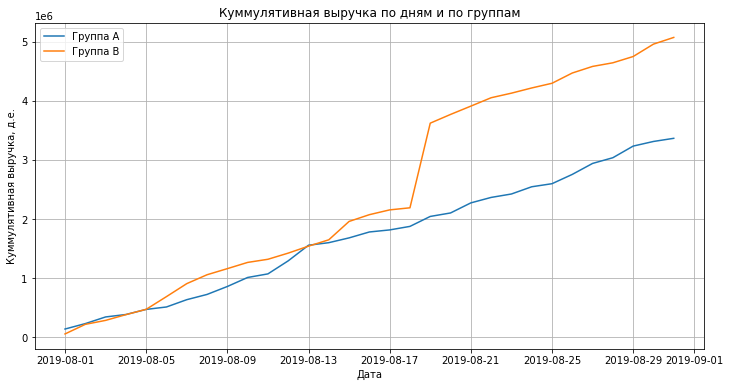

In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 6))

# строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='Группа A')

# строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='Группа B')

plt.legend()
plt.grid()
plt.xlabel('Дата')
plt.title('Куммулятивная выручка по дням и по группам')
plt.ylabel('Куммулятивная выручка, д.е.')
plt.show();

До определенного момента выручка растет равномерно для обеих групп, при этом у группы B она стабильно чуть выше. Во второй половине месяца выручка группы B растет активней. 

На графике можем выделить резкий скачок у группы B 19 числа, что может говорить нам о всплесках числа заказов, либо о появлении аномально дорогих заказов в выборке.

Посмотрим какие заказы были в группе B в районе 19 августа:

In [21]:
non_cross_orders.query(
    'date == @dt.date(2019, 8, 19) and group == "B"'
).sort_values(by='revenue', ascending=False).head()

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
527,1570513684,2837914161,2019-08-19,33405,B
461,2683113224,154576532,2019-08-19,26550,B
368,3268879337,2536252163,2019-08-19,20026,B
463,4170537404,290022471,2019-08-19,16480,B


Видим, что заказ номер 590470918 составляет почти 1.3 млн. д.е.

Посмотрим медианное значение стоимости заказа в нашем интернет-магазине:

In [22]:
non_cross_orders['revenue'].median()

2955.0

Очевидно, увиденный нами на графике пик вызван аномально большим заказом, сделанным 19 августа в группе B. В остальном можем предположить, что кумулятивная выручка в группе B во второй половине месяца была стабильно выше выруки группы A.

### Куммулятивный средний чек по группам

Построим график среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

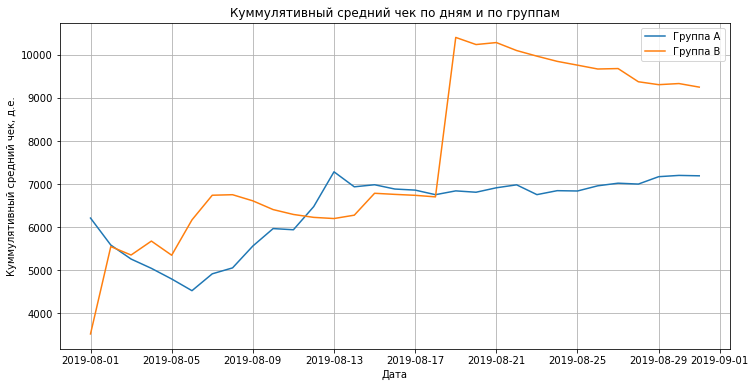

In [23]:
plt.figure(figsize=(12, 6))

# строим график среднего чека группы А
plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], 
         label='Группа A')

# строим график среднего чека группы B
plt.plot(cumulative_revenue_b['date'], 
         cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], 
         label='Группа B')

plt.legend()
plt.grid()
plt.xlabel('Дата')
plt.title('Куммулятивный средний чек по дням и по группам')
plt.ylabel('Куммулятивный средний чек, д.е.')
plt.show(); 

Видим, что за исключением 1 августа, а также периода с 12 по 18 августа, средний чек в группе B был выше среднего чека группы A. Как и на графике куммулятивной выручки, видим резкий скачок 19 августа, вызванный аномально большим заказом. 

Во второй половине периода средний чек группы A устанавливается вокруг определенного значения, тогда как для группы B он имеет тенденцию к снижению.

### Относительное изменение куммулятивного среднего чека группы B к группе A

Построим график относительного изменения кумулятивного среднего чека группы B к группе A:

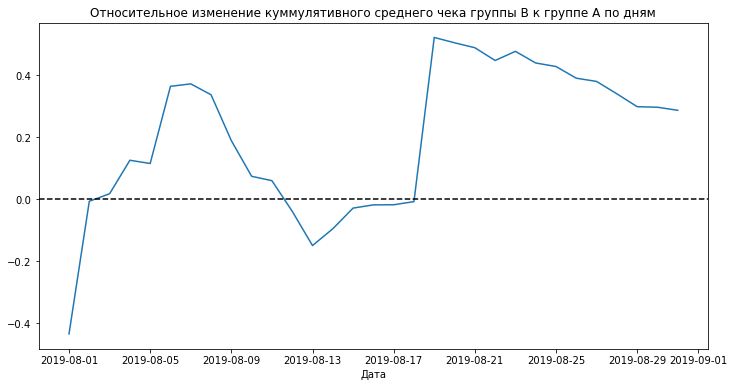

In [24]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12, 6))
plt.plot(merged_cumulative_revenue['date'],
         (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/
         (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('Дата')
plt.title('Относительное изменение куммулятивного среднего чека группы B к группе A по дням')
plt.show();

Опять видим, что 1 августа, а также 12-18 августа, средний чек группы A превышает средний чек группы B. В остальном по среднему чеку превалирует группа B.

В нескольких точках график различия между сегментами резко «скачет», что говорит нам о крупных заказа и выбросах.
Опять видим резкий скачок в сторону роста группы B 19 числа, вызванный аномально крупным заказом.

### Куммулятивная конверсия по группам

Построим график кумулятивной конверсии по группам:

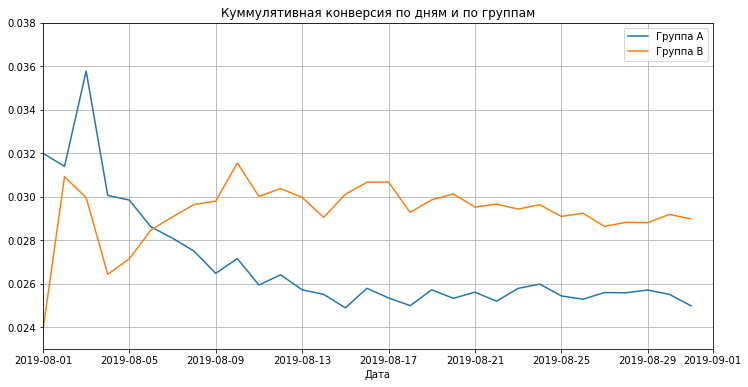

In [25]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.figure(figsize=(12, 6))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='Группа A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='Группа B')
plt.legend()

# задаем масштаб осей
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), 0.023, 0.038])

plt.grid()
plt.xlabel('Дата')
plt.title('Куммулятивная конверсия по дням и по группам')
plt.show();

В самом начале теста с выраженным пиком 3 августа большую конверсию демонстрировала группа A. В районе 5-6 августа куммулятивная конверсия группы B начала расти и превысила конверсию группы, которая наоборот с этого момента начала падать. В целом, группа B практически на протяжении всего теста демонстрирует большую конверсию, чем группа A.

### Относительное изменение куммулятивной конверсии группы B к группе A

Построим график относительного изменения кумулятивной конверсии группы B к группе A:

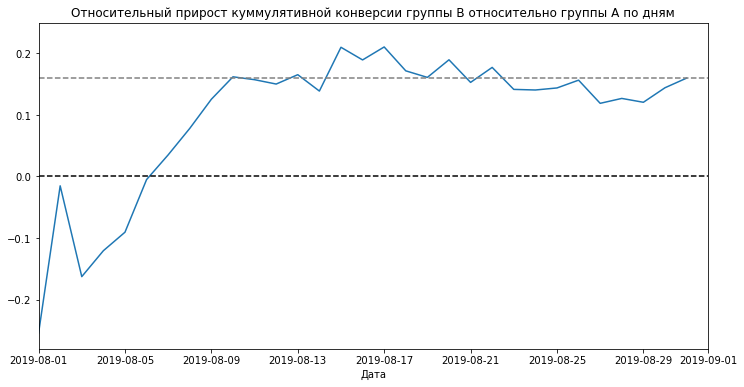

In [26]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 6))
plt.plot(merged_cumulative_conversions['date'],
         merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), -0.28, 0.25])

plt.xlabel('Дата')
plt.title('Относительный прирост куммулятивной конверсии группы B относительно группы A по дням')
plt.show();

За исключением начального периода теста видим, что конверсия группы B стабильно выше конверсии группы A. По окончании теста видим, что конверсия группы B превышает конверсию группы A на 16%.  

### Количество заказов по пользователям

Построим точечный график количества заказов:

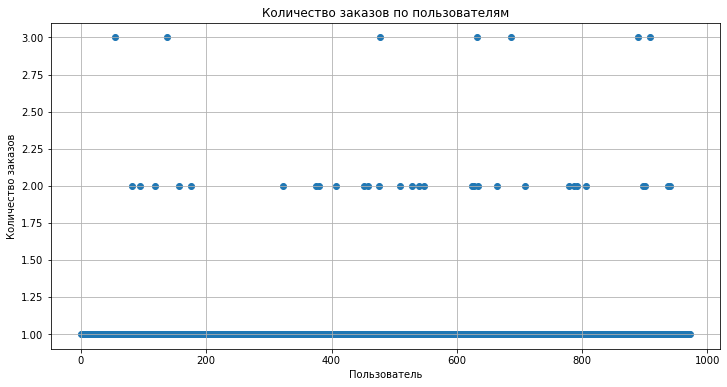

In [27]:
orders_by_users = (
    non_cross_orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_users.columns = ['user_id', 'orders']

x_values = pd.Series(range(0,len(orders_by_users)))

plt.figure(figsize=(12, 6))
plt.scatter(x_values, orders_by_users['orders'])
plt.grid()
plt.xlabel('Пользователь')
plt.ylabel('Количество заказов')
plt.title('Количество заказов по пользователям')
plt.show();

Видим, что в основном пользователи ограничиваются 1-2 заказами. Все, что выше 2 заказов, предположительно, можно отнести к аномалиям. Наибольшее число пользователей совершают не более 1 заказа.

### 90-й, 95-й и 99-й перцентили количества заказов на пользователя

Посчитаем 90-й, 95-й и 99-й перцентили количества заказов:

In [28]:
np.percentile(orders_by_users['orders'], [90, 95, 99])

array([1., 1., 2.])

Не более 1% пользователей совершали больше 2 заказов. 5% пользователей заказывали более одного раза,.

На основании этого возьмём за нижнюю границу количество заказов равное 2, и по ней будем отсекать аномальных пользователей.

### Стоимость заказов

Построим точечный график стоимости заказов по пользователям:

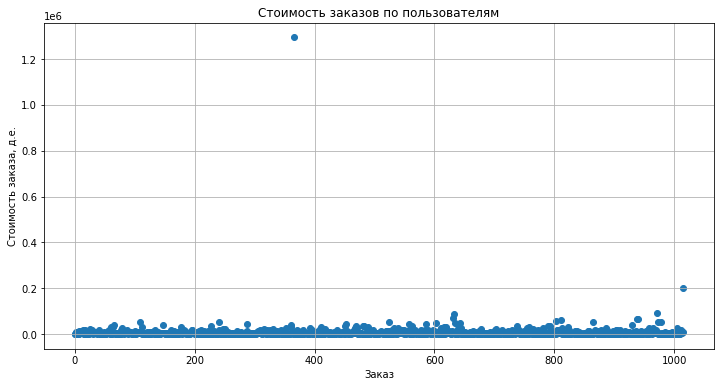

In [29]:
x_values = pd.Series(range(0,len(non_cross_orders['revenue'])))

plt.figure(figsize=(12, 6))
plt.scatter(x_values, non_cross_orders['revenue'])
plt.grid()
plt.xlabel('Заказ')
plt.ylabel('Стоимость заказа, д.е.')
plt.title('Стоимость заказов по пользователям')
plt.show();

Сразу видим обнаруженный нами ранее заказ от 19 августа стоимостью порядка 1.3 млн. д.е. Также видим выброс в районе 200 000 д.е. 

Заказов более 100 000 д.е. практически не наблюдается.

Рассмотрим данные в таблице без учета обнаружнных выбросов:

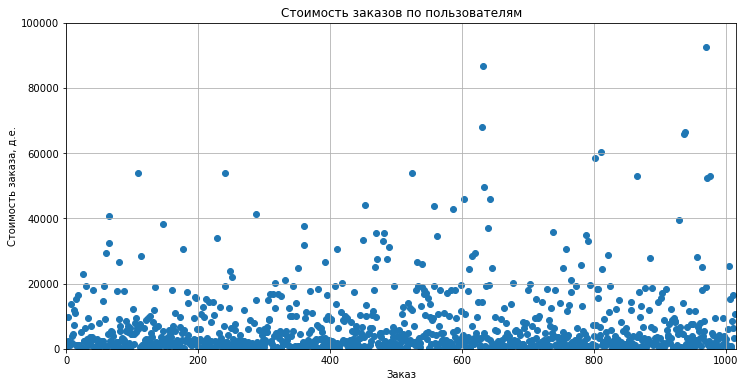

In [30]:
x_values = pd.Series(range(0,len(non_cross_orders['revenue'])))

plt.figure(figsize=(12, 6))
plt.scatter(x_values, non_cross_orders['revenue'])
plt.axis([0, 1016, 0, 100000])
plt.grid()
plt.xlabel('Заказ')
plt.ylabel('Стоимость заказа, д.е.')
plt.title('Стоимость заказов по пользователям')
plt.show();

Видим, что основная масса заказов сосредоточена в области менее 20 000 д.е.

### 90-й, 95-й и 99-й перцентили стоимости заказов

Посчитаем 90-й, 95-й и 99-й перцентили стоимости заказов на пользователя:

In [31]:
np.percentile(non_cross_orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

Не более 5% заказов дороже 26 785 д.е. и не более 1% дороже 53 904 д.е.

Округлим и возьмем за нижнюю границу стоимость заказа в 30 000 д.е.

### Статистическая значимость различий в конверсии между группами по «сырым» данным

Посчитаем по каждой группе количество заказов и выручку в выбранную дату, а также суммарное число заказов и суммарную выручку до выбранной даты включительно:

In [32]:
# количество заказов и выручка в выбранную дату для группы A
orders_a_daily = (
    non_cross_orders[non_cross_orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# суммарное число заказов до выбранной даты включительно для группы A
orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = ['date', 'orders_cummulative_a','revenue_cummulative_a']

# количество заказов в выбранную дату для группы B
orders_b_daily = (
    non_cross_orders[non_cross_orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# суммарное число заказов до выбранной даты включительно для группы B
orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = ['date', 'orders_cummulative_b','revenue_cummulative_b']

Посчитаем по каждой группе количество пользователей в выбранную дату, а также суммарное количество пользователей до выбранной даты включительно:

In [33]:
# количество заказов и выручка в выбранную дату для группы A
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# суммарное число количество пользователей до выбранной даты включительно для группы A
visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

# количество заказов и выручка в выбранную дату для группы B
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# суммарное число количество пользователей до выбранной даты включительно для группы B
visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

Объединим все расчеты в одну таблицу:

In [34]:
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Посчитаем статистическую значимость различия в конверсии между группами (для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов):

In [35]:
orders_by_users_a = (
    non_cross_orders[non_cross_orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = (
    non_cross_orders[non_cross_orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['user_id', 'orders']

Объявим переменные `sample_a` и `sample_b`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [36]:
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Обозначим уровень значимости 0.05 и напишем функцию для проверки гипотез:

In [37]:
alpha=.05

def test(df1, df2):
    
    print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(df1, df2)[1]))
    
    if stats.mannwhitneyu(df1, df2)[1] < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")
        
    print('Относительный прирост конверсии группы B:', "{0:.1%}".format(df2.mean() / df1.mean() - 1))

Сформулируем гипотезы:
* Нулевая гипотеза: различий в конверсии между группами нет. 
* Альтернативная гипотеза: различия в конверсии между группами есть.

Выведем p-value и относительный прирост конверсии группы B при помощи функции `test`: 

In [38]:
test(sample_a, sample_b)

p-value: 0.011
Отвергаем нулевую гипотезу
Относительный прирост конверсии группы B: 16.0%


p-value меньше 0.05. Мы отвергаем нулевую гипотезу и принимает гипотезу о том, что различия в конверсии между группами есть. Анализ "сырых" данных показывает нам, что в конверсии между группами есть статистически значимые различия.

Относительный прирост конверсии группы B к конверсии группы A равен 16%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы для проверки статистической значимости различий в среднем чеке между сегментами:

* Нулевая гипотеза: различий в среднем чеке между группами нет. 
* Альтернативная гипотеза: различия в среднем чеке между группами есть.

Выведем p-value и относительные различия в среднем чеке между группами:

In [39]:
test(non_cross_orders[non_cross_orders['group']=='A']['revenue'],
     non_cross_orders[non_cross_orders['group']=='B']['revenue'])

p-value: 0.829
Не получилось отвергнуть нулевую гипотезу
Относительный прирост конверсии группы B: 28.7%


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

Прирост среднего чека группы B относительно среднего чека группы A составляет 28.7%.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Ранее мы определили границы аномальных значений. Примем за аномальных пользователей тех, кто совершил более 2 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — `users_with_many_orders` и пользователей, совершивших заказы дороже 30 000 — `users_with_expensive_orders`. Объединим их в таблице `abnormal_users`.

Узнаем, сколько всего аномальных пользователей методом shape().

Выделим аномальные заказы:

In [40]:
# срез пользователей с числом заказов больше 2
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['user_id'],
       orders_by_users_b[orders_by_users_b['orders'] > 2]['user_id'],
    ],
    axis=0,
)

# срез пользователей, совершивших заказы дороже 30 000
users_with_expensive_orders = non_cross_orders[non_cross_orders['revenue'] > 30000]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormal_users.head(5))
display(abnormal_users.shape)

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
dtype: int64

(49,)

Всего 49 аномальных пользователей.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [41]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [42]:
test(sample_a_filtered, sample_b_filtered)

p-value: 0.010
Отвергаем нулевую гипотезу
Относительный прирост конверсии группы B: 18.7%


Результаты по конверсии практически не изменились. p-value меньше 0.05, т.е. различия в конверсии между группами есть. Прирост конверсии группы B относительно группы A увеличился с 16% до 18.7%.

### Статистическая значимость различий в  среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по "очищенным" данным:

In [43]:
test(non_cross_orders[
                np.logical_and(
                    non_cross_orders['group'] == 'A',
                    np.logical_not(non_cross_orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            non_cross_orders[
                np.logical_and(
                    non_cross_orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'])

p-value: 0.741
Не получилось отвергнуть нулевую гипотезу
Относительный прирост конверсии группы B: -2.7%


C:\Users\Admin\AppData\Local\Temp/ipykernel_5636/4133462658.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_cross_orders[


P-value значительно больше 0.05, значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Но по очищенным данным средний чек группы B стал на 2.7% ниже среднего чека группы A (по сырым данным по группе B было превышение на 28.7%). Очевидно, все дело в том самом аномально большом заказе от 19 августа.

### Вывод по результатам A/B-теста

В результате анализа A/B-теста мы выяснили слеующее:

* И по "сырым", и по "очищенным" данным у конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A по "сырым" данным равен 16%, по "очищенным" данным — 18.7%;

* Нет статистически значимого различия по среднему чеку между группами ни по "сырым", ни по "очищенным" данным. Прирост среднего чека группы B относительно среднего чека группы A по "сырым" данным составляет 28.7%, а по "очищенным" данным составляет -2.7%;

* График различия конверсии между группами сообщает, что результаты группы A хуже группы B; 

На основании всего вышеперечисленного можно принять решение об остановке теста и признании победы за группой B.

<a id="step5"></a>
## Общий вывод

Мы провели исследование для крупного интернет-магазина во временном периоде с 2019-08-01 по 2019-08-31. В нашем распоряжении были 3 таблицы: в первой содержались сформулированные гипотезы и их оценки по различным параметрам, в остальных двух - данные о логах при проведении A/B-теста с разбивкой на группы, а именно: данные о пользователях и совершенных ими заказах, полученной выручке, а также данные о посещениях пользователями интернет-магазина. Перед нами стояла задача приоритезации гипотез и анализа проведенного A/B-теста .

Наше исследование состяло из нескольких этапов:

1. Мы исследовали приоритезацию составленных гипотез. По фреймворку ICE лидируют гипотезы 8, 0, 7, 6, тогда как по фреймфорку RICE лидируют гипотезы 7, 2, 6, 0.

Исходя из того, что при приоритезации гипотез важно помнить о том, какое количество пользователей затронет привносимое изменение, наиболее перспективными для тестирования нам видятся гипотезы 7 ("Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок") и 2 ("Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа").

2. Мы проанализировали результаты A/B теста:

* Выяснилось, что по показателям куммулятивной выручки, среднему чеку и конверсии по "сырым" данным практически на протяжении всего теста лидировала группа B.

* Мы обнаружили 2 аномально дорогих заказа стоимостью порядка 1.3 млн. д.е. и 200 тыс. д.е., которые оказывали влияние на результат теста.

* Для очистки данных от аномалий мы определили граничные значения: не более 2 заказов от одного пользователя и стоимость каждого отдельного заказа не более 30 000 д.е.  

* До и после очистки данных у конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы A по "сырым" данным равен 16%, по "очищенным" данным — 18.7%.

* До и после очистки данных статистически значимые различия по среднему чеку между группами отсутствуют. Прирост среднего чека группы B относительно среднего чека группы A по "сырым" данным составляет 28.7%, а по "очищенным" данным составляет -2.7%.

В результате проведенного анализа можно принять решение об остановке теста и признать победу за группой B.